# Finding optimal hyper parameters for a CNN model

The point of this notebook is to obtain an optimal set of parameters for our CNN model to process time based series data. Specifically, we are processing IoT data from TON a well-kept dataset from The UNSW Group in Canberra, Australia.

The specific dataset being discussed here is the IoT Motion Light dataset.



We have pip install mealpy each time because it is not a default python package ,and every time the runtime refreshes; the package is uninstalled.

In [ ]:
%pip install mealpy==3.0.1
%pip install tensorflow
%pip install -U scikit-learn
%pip install imbalanced-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Our main libraries used are:

*   Imblearn
*   Pandas
*   Matplot Lib
*   MealPy
*   Numpy
*   SKLearn
*   Tensorflow
*   Time

In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
import numpy
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from mealpy import FloatVar, FOX
import time

# Preparing the Datasets for the CNN Model

We split off the information that indicates whether or not an attack has occured (*label*) and the types of attacks (*type*).
Now there are three dataframes:
  X - all features
  y - attack or not
  y_type - type of attack

We split again into test and train data sets and include some randomness.
**Reset_index** drops the indexes from these new dataframes.
Next, we encode the text data, add another randomness, and scale all dataframes. The X dataframe is reshaped.

In [ ]:
#Uncomment for local use
#raw_data = pandas.read_csv('../../Train_Test_IoT_dataset/Train_Test_IoT_Motion_Light.csv')
#Uncomment for Google Colab
raw_data = pandas.read_csv('Train_Test_IoT_Motion_Light.csv')
X = raw_data.drop(columns=['label','type'])
y = raw_data['label']
y_type = raw_data['type']

In [ ]:
# Binary
X_train, X_testsplit, y_train, y_testsplit = train_test_split(X, y, test_size=0.2, random_state=777)
# Binary validation
X_test, X_validation, y_test, y_validation = train_test_split(X_testsplit, y_testsplit, test_size=0.5, random_state=777)

#drop index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)
X_validation_encode = encoder.fit_transform(X_validation)
y_validation_encode = label_encoder.fit_transform(y_validation)

In [ ]:
smotetomek = SMOTETomek(random_state=777)
X_rebalance, y_rebalance = smotetomek.fit_resample(X_train_encode, y_train_encode)

In [ ]:
scaler = StandardScaler()
X_rebalance = scaler.fit_transform(X_rebalance)
X_test_encode = scaler.transform(X_test_encode)

X_validation_encode = scaler.transform(X_validation_encode)

In [ ]:
X_rebalance = X_rebalance.reshape(X_rebalance.shape[0], X_rebalance.shape[1], 1)
X_test_encode = X_test_encode.reshape(X_test_encode.shape[0], X_test_encode.shape[1], 1)

X_validation_encode = X_validation_encode.reshape(X_validation_encode.shape[0], X_validation_encode.shape[1], 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 50)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,633 (248.57 KB)

 Trainable params: 63,533 (248.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5059 - loss: 0.6934 - val_accuracy: 0.6186 - val_loss: 0.6919
Epoch 2/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5047 - loss: 0.6934 - val_accuracy: 0.6186 - val_loss: 0.6918
Epoch 3/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5042 - loss: 0.6935 - val_accuracy: 0.6186 - val_loss: 0.6917
Epoch 4/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5039 - loss: 0.6932 - val_accuracy: 0.6186 - val_loss: 0.6916
Epoch 5/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5007 - loss: 0.6935 - val_accuracy: 0.6186 - val_loss: 0.6914
Epoch 6/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5004 - loss: 0.6934 - val_accuracy: 0.6186 - val_loss: 0.6914
Epoch 7/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5009 - loss: 0.6937 - val_accuracy: 0.6186 - val_loss: 0.6911
Epoch 8/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5068 - loss: 0.6931 - val_accuracy: 0.

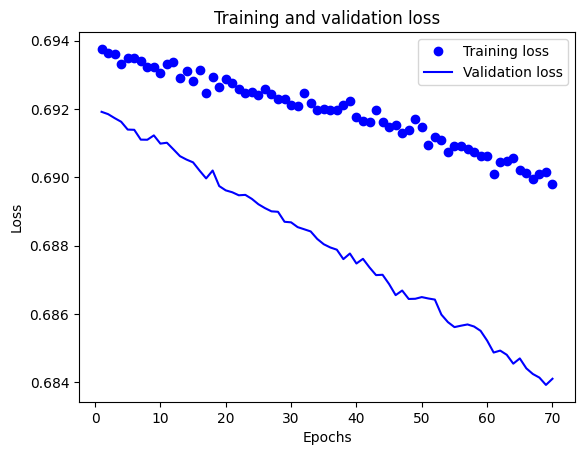

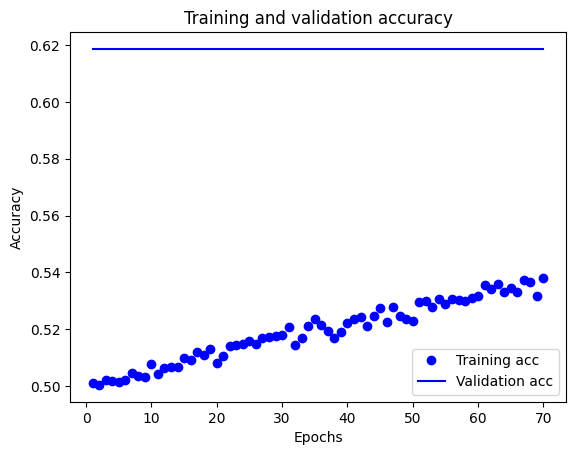


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1556
           1       0.61      1.00      0.75      2393

    accuracy                           0.61      3949
   macro avg       0.30      0.50      0.38      3949
weighted avg       0.37      0.61      0.46      3949


Confusion Matrix
[[   0 1556]
 [   0 2393]]


c:\Users\onius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\onius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\onius\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

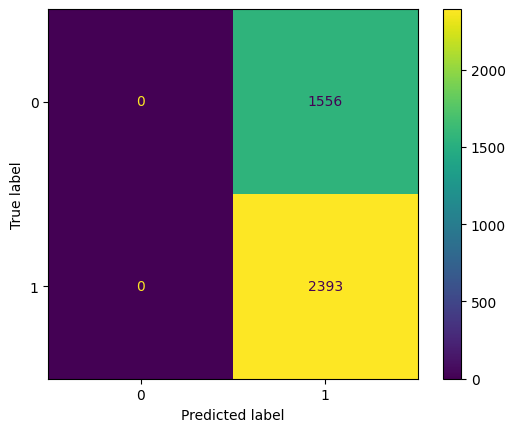

Time taken: 86.0204 seconds


In [ ]:
start_time_1 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time1 = time.perf_counter()
print(f"Time taken: {end_time1 - start_time_1:0.4f} seconds")

# Optimizing the model
Instead of looking at random number ranges for learning rates, filters, and hidden units, we have encoded specific values.

The hyper parameters we are attempting to optimize are:

*   Batch Size
*   Activation Functions
*   Learning Rates
*   Filters
*   Hidden Units

The base CNN model we made is ingested into *objective_function*.
  This is where our hyper parameters are being considered.
  It returns the Accuracy of that particular iteration.
**LB** and **UB** is set according to the list given above.



2025/04/14 11:53:52 PM, INFO, mealpy.swarm_based.FOX.OriginalFOX: Solving single objective optimization problem.


Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.35882502794265747
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.5419093370437622
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.8647758960723877
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3998480439186096
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.294758141040802
Accuracy 0.3813623785972595
Accuracy 0.35882502794265747
Accuracy 0.3165358304977417
Accuracy 0.3813623785972595
Accuracy 0.2962775230407715
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3198277950286865
Accuracy 0.24613827

2025/04/15 12:10:40 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 1, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 562.80998 seconds


Accuracy 0.35705244541168213
Accuracy 0.6186376214027405
Accuracy 0.3059002161026001
Accuracy 0.3813623785972595
Accuracy 0.4872119426727295
Accuracy 0.24613827466964722
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.29551786184310913
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3076728582382202
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.3757913112640381
Accuracy 0.24613827466964722


2025/04/15 12:19:37 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 2, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 536.63945 seconds


Accuracy 0.4872119426727295
Accuracy 0.3813623785972595
Accuracy 0.3345150947570801
Accuracy 0.3076728582382202
Accuracy 0.4327678084373474
Accuracy 0.3813623785972595
Accuracy 0.3018485903739929
Accuracy 0.35603952407836914
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.24613827466964722
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.27981770038604736
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3557862639427185


2025/04/15 12:27:52 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 3, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 495.23323 seconds


Accuracy 0.2539883255958557
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.36034440994262695
Accuracy 0.2851354479789734
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3345150947570801
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.29551786184310913


2025/04/15 12:36:32 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 4, Current best: 0.2851354479789734, Global best: 0.24613827466964722, Runtime: 520.19392 seconds


Accuracy 0.3324892520904541
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.43124842643737793
Accuracy 0.35882502794265747
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.5401367545127869
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405


2025/04/15 12:44:41 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 5, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 488.47579 seconds


Accuracy 0.3813623785972595
Accuracy 0.35882502794265747
Accuracy 0.24613827466964722
Accuracy 0.4629020094871521
Accuracy 0.3198277950286865
Accuracy 0.29551786184310913
Accuracy 0.285388708114624
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.26107877492904663
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405


2025/04/15 12:53:25 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 6, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 524.12822 seconds


Accuracy 0.3813623785972595
Accuracy 0.678652822971344
Accuracy 0.24791085720062256
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.5654596090316772
Accuracy 0.6186376214027405
Accuracy 0.30944544076919556
Accuracy 0.3998480439186096
Accuracy 0.6186376214027405
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.6062294244766235
Accuracy 0.3813623785972595


2025/04/15 01:01:26 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 7, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 481.51395 seconds


Accuracy 0.34008610248565674
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.26107877492904663
Accuracy 0.5864775776863098
Accuracy 0.2661433219909668
Accuracy 0.29551786184310913
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.31425678730010986
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.6700430512428284
Accuracy 0.6062294244766235
Accuracy 0.3813623785972595
Accuracy 0.3357812166213989


2025/04/15 01:09:33 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 8, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 486.76149 seconds


Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.27804505825042725
Accuracy 0.29551786184310913
Accuracy 0.3228665590286255
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.35882502794265747
Accuracy 0.3813623785972595
Accuracy 0.27804505825042725
Accuracy 0.3198277950286865
Accuracy 0.24613827466964722
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.3345150947570801
Accuracy 0.29551786184310913
Accuracy 0.6186376214027405


2025/04/15 01:17:31 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 9, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 478.02138 seconds


Accuracy 0.24613827466964722
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.6700430512428284
Accuracy 0.478348970413208
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.415801465511322
Accuracy 0.6186376214027405
Accuracy 0.3567991852760315
Accuracy 0.3813623785972595
Accuracy 0.35882502794265747
Accuracy 0.3048872947692871
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.35882502794265747


2025/04/15 01:25:36 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 10, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 485.33603 seconds


Accuracy 0.3993415832519531
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3076728582382202
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.32843756675720215
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.24613827466964722
Accuracy 0.29551786184310913
Accuracy 0.24613827466964722
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.29551786184310913
Accuracy 0.3813623785972595


2025/04/15 01:34:00 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 11, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 503.53918 seconds


Accuracy 0.24613827466964722
Accuracy 0.2694352865219116
Accuracy 0.6186376214027405
Accuracy 0.24613827466964722
Accuracy 0.3998480439186096
Accuracy 0.6062294244766235
Accuracy 0.3998480439186096
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3198277950286865
Accuracy 0.6186376214027405
Accuracy 0.3198277950286865
Accuracy 0.6186376214027405
Accuracy 0.29551786184310913
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.35705244541168213
Accuracy 0.32843756675720215


2025/04/15 01:42:31 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 12, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 511.25641 seconds


Accuracy 0.5130412876605988
Accuracy 0.3813623785972595
Accuracy 0.32843756675720215
Accuracy 0.29551786184310913
Accuracy 0.3813623785972595
Accuracy 0.4872119426727295
Accuracy 0.46948593854904175
Accuracy 0.3813623785972595
Accuracy 0.29298555850982666
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.7824765741825104
Accuracy 0.32109397649765015
Accuracy 0.30817925930023193
Accuracy 0.24613827466964722
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.3684477210044861
Accuracy 0.3813623785972595
Accuracy 0.35705244541168213


2025/04/15 01:50:06 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 13, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 455.01438 seconds


Accuracy 0.28741455078125
Accuracy 0.24613827466964722
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.2509496212005615
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.46746009588241577
Accuracy 0.6186376214027405
Accuracy 0.3198277950286865
Accuracy 0.6186376214027405
Accuracy 0.4872119426727295
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.4958217144012451
Accuracy 0.6029374599456787
Accuracy 0.3813623785972595


2025/04/15 01:58:52 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 14, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 526.24719 seconds


Accuracy 0.6186376214027405
Accuracy 0.24613827466964722
Accuracy 0.25474804639816284
Accuracy 0.3345150947570801
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.30564701557159424
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.28032416105270386
Accuracy 0.28741455078125
Accuracy 0.3198277950286865
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.4872119426727295
Accuracy 0.3813623785972595
Accuracy 0.4874652028083801
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405


2025/04/15 02:07:17 AM, INFO, mealpy.swarm_based.FOX.OriginalFOX: >>>Problem: P, Epoch: 15, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 504.24743 seconds


Accuracy 0.43985819816589355
Solution: [1.11831926 2.96304005 5.15889524 1.09551513 2.99      ], Fitness: 0.24613827466964722
Solution: [1.11831926 2.96304005 5.15889524 1.09551513 2.99      ], Fitness: 0.24613827466964722


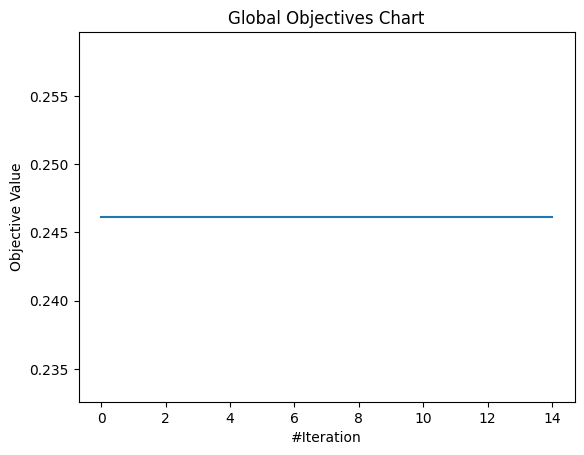

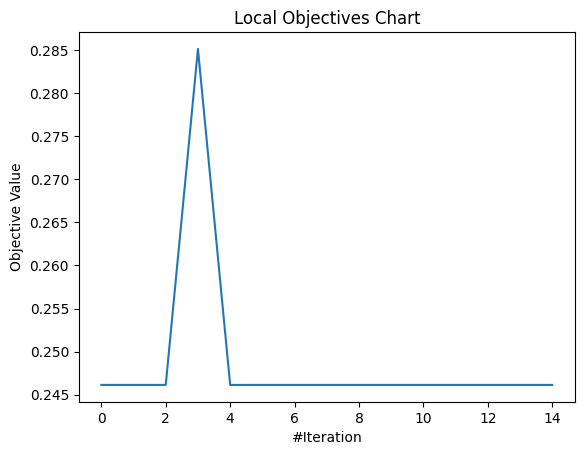

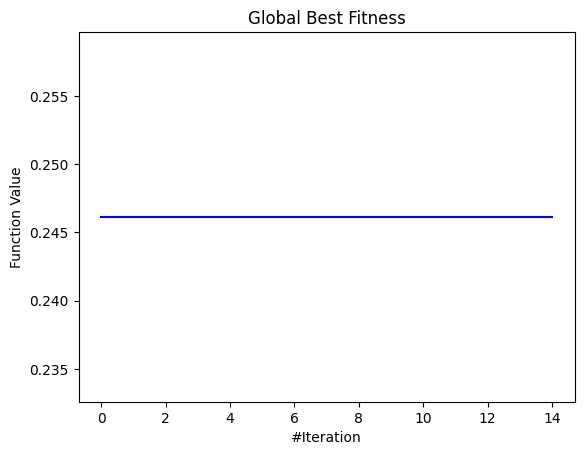

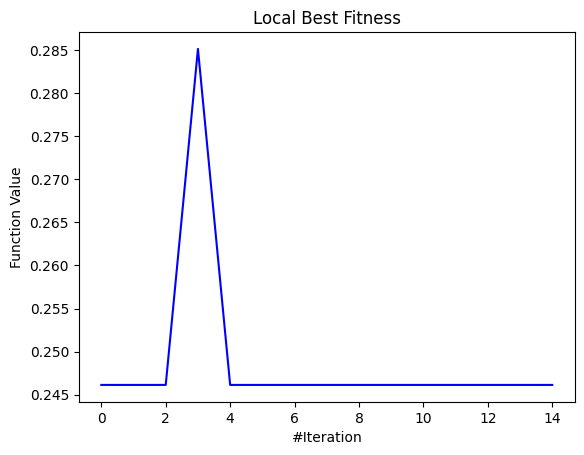

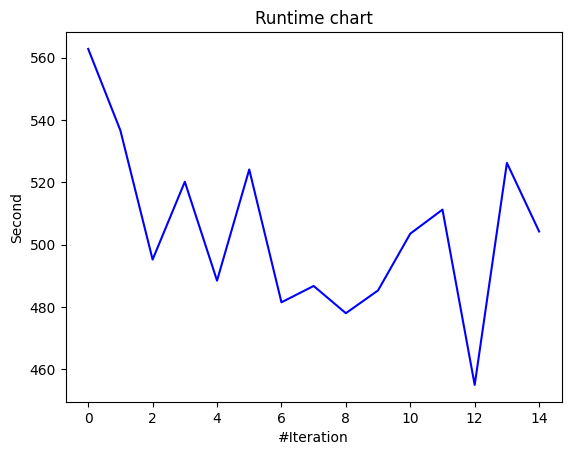

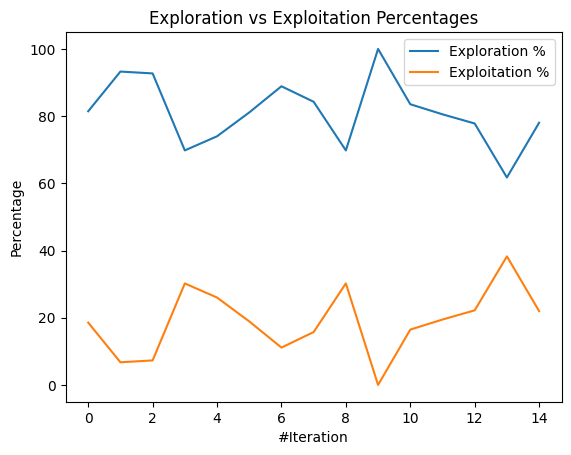

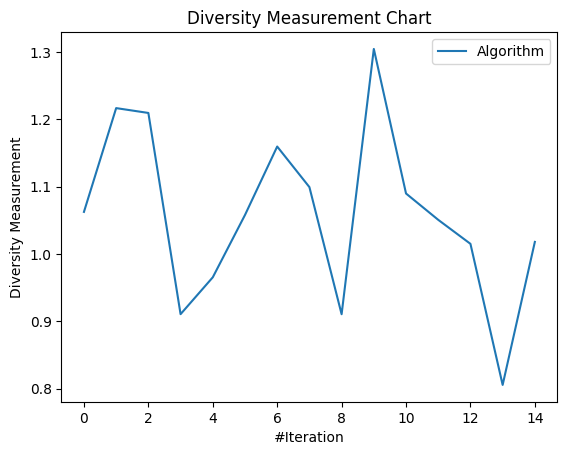

In [ ]:
BATCH_ENCODER = LabelEncoder()
BATCH_ENCODER.fit([32, 64, 128])

#act encoder --> Which activation function should be used?
ACT_ENCODER = LabelEncoder()
ACT_ENCODER.fit(['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

#Learning Rate encoder
LR_ENCODER = LabelEncoder()
LR_ENCODER.fit([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])


#Filter encoder
FILTER_ENCODER = LabelEncoder()
FILTER_ENCODER.fit([25, 50, 75])

#Hidden Units encoder
HIDDEN_ENCODER = LabelEncoder()
HIDDEN_ENCODER.fit([400, 512, 640])

#Dense Layer encoder
DENSE_ENCODER = LabelEncoder()
DENSE_ENCODER.fit([5, 8, 10])

def objective_function(params):
  '''RULES:
      Batch Size - 32, 64, 128
      Activation - softmax, softplus, relu, tanh, sigmoid, hard_sigmoid, linear
      Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1
      Filters - 25, 50, 75
      Hidden Units - 400, 512, 640
      Dense Layers - 5, 8, 10
  '''
  batch_size = BATCH_ENCODER.inverse_transform([int(params[0])])[0]
  activation = ACT_ENCODER.inverse_transform([int(params[1])])[0]
  learning_rate = LR_ENCODER.inverse_transform([int(params[2])])[0]
  filter = FILTER_ENCODER.inverse_transform([int(params[3])])[0]
  hidden_units = HIDDEN_ENCODER.inverse_transform([int(params[4])])[0]
  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1], X_rebalance.shape[2]))),
  model.add(tensorflow.keras.layers.Conv1D(filters=filter, kernel_size=3, activation='sigmoid')),
  model.add(tensorflow.keras.layers.MaxPooling1D(pool_size=2)),
  model.add(tensorflow.keras.layers.Dropout(0.3)),
  model.add(tensorflow.keras.layers.BatchNormalization()),
  model.add(tensorflow.keras.layers.LSTM(64)),
  model.add(tensorflow.keras.layers.Flatten()),
  model.add(tensorflow.keras.layers.Dense(int(hidden_units), activation=activation)),
  model.add(tensorflow.keras.layers.Dropout(0.5)),
  model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_rebalance, y_rebalance, batch_size=batch_size, epochs=15, validation_data=(X_validation_encode, y_validation_encode), verbose=0)
  min_validation_accuracy = 1-history.history['val_accuracy'][-1]
  print(f"Accuracy {min_validation_accuracy}")
  return min_validation_accuracy

LB = [0, 0, 0, 0, 0]
UB = [2.99, 6.99, 5.99, 2.99, 2.99]

problem_dict = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=LB, ub=UB),
    "minmax": "min",
    "verbose": True
}

model = FOX.OriginalFOX(epoch=15, pop_size=20, c1=0.18, c2=0.82)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
model.history.save_global_objectives_chart(filename="hello/goc")
model.history.save_local_objectives_chart(filename="hello/loc")

model.history.save_global_best_fitness_chart(filename="hello/gbfc")
model.history.save_local_best_fitness_chart(filename="hello/lbfc")

model.history.save_runtime_chart(filename="hello/rtc")

model.history.save_exploration_exploitation_chart(filename="hello/eec")

model.history.save_diversity_chart(filename="hello/dc")

Accuracy 0.43985819816589355
Solution: [1.11831926 2.96304005 5.15889524 1.09551513 2.99      ], Fitness: 0.24613827466964722

Batch Size - 32, **64**, 128

Activation - softmax, softplus, **relu**, tanh, sigmoid, hard_sigmoid, linear

Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, **0.1**

Filters - 25, **50**, 75

Hidden Units - 400, 512, **640**

Model: "sequential_323"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_323 (Conv1D)             │ (None, 2, 50)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_323               │ (None, 1, 50)          │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_646 (Dropout)           │ (None, 1, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_323         │ (None, 1, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_323 (LSTM)                 │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_323 (Flatten)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_646 (Dense)               │ (None, 640)            │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_647 (Dropout)           │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_647 (Dense)               │ (None, 1)              │           641 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,081 (281.57 KB)

 Trainable params: 71,981 (281.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5058 - loss: 0.6932 - val_accuracy: 0.6186 - val_loss: 0.6784
Epoch 2/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5517 - loss: 0.6861 - val_accuracy: 0.6186 - val_loss: 0.6650
Epoch 3/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6236 - loss: 0.6529 - val_accuracy: 0.6186 - val_loss: 0.6822
Epoch 4/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6963 - loss: 0.5765 - val_accuracy: 0.4117 - val_loss: 1.0848
Epoch 5/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7998 - loss: 0.4430 - val_accuracy: 0.5128 - val_loss: 1.8048
Epoch 6/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8470 - loss: 0.3489 - val_accuracy: 0.6716 - val_loss: 2.1482
Epoch 7/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8789 - loss: 0.2822 - val_accuracy: 0.6716 - val_loss: 2.3618
Epoch 8/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9130 - loss: 0.2141 - val_accuracy: 0.

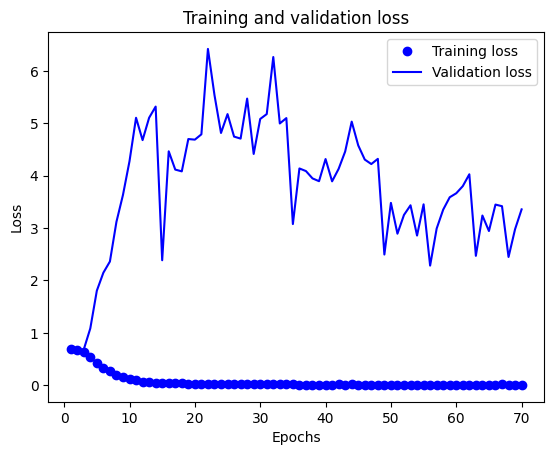

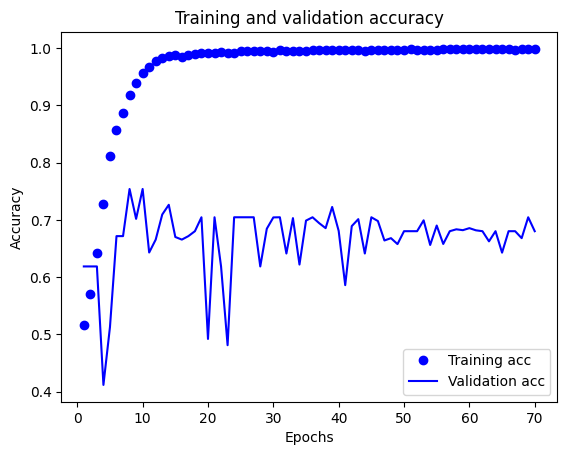


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.16      0.28      1556
           1       0.65      1.00      0.79      2393

    accuracy                           0.67      3949
   macro avg       0.82      0.58      0.53      3949
weighted avg       0.79      0.67      0.59      3949


Confusion Matrix
[[ 255 1301]
 [   0 2393]]


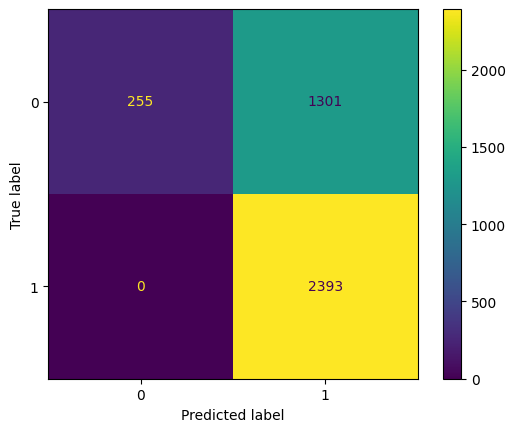

Time taken: 92.8497 seconds


In [ ]:
start_time_2 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(640, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.1)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time2 = time.perf_counter()
print(f"Time taken: {end_time2 - start_time_2:0.4f} seconds")